**TIME SERIES PRICE PREDICTION FOR BITCOIN**

**Introduction:** Bitcoin (BTC OR BTC-USD) is a decentralized cryptocurrency originally described in a 2008 whitepaper by a person, or group of people, using the alias Satoshi Nakamoto. It was launched soon after, in January 03, 2009. 
Bitcoin is a peer-to-peer online currency, meaning that all transactions happen directly between equal, independent network participants, without the need for any intermediary to permit or facilitate them. Bitcoin was created, according to Nakamoto’s own words, to allow “online payments to be sent directly from one party to another without going through a financial institution.”
Source: https://coinmarketcap.com/currencies/bitcoin/                                                                                                                                                           

**Objective:**  To addresse the challenges of high price volatility in cryptocurrency markets, providing investors, analysts and traders with data-driven insights for better-informed decision-making and risk management in Bitcoin trading through Predict short-term or long-term price movements in Bitcoin trading.

**Solution:** Use historical price data to train models like LSTM and Prophet to forecast future prices. 
This can be especially useful for planning entry and exit points for trades.

Data Collection: BTC open, high, low and close prices from 2014-09-17 was be obtained from the Yahoo finance library in python and stored in variable for preprocessing.

Data Exploration/Cleaning/Propressing: The obtained data was explored, cleaned, missing data checked and unwanted columns dropped, the data was scalled and ready for train_test split

Data Visualization: BTC data was visualized using matplotlib to spot trends and have a general overview of the dataset.

Data Modelling: The data was modelled using  LGBMClassifier, logisticRegression, SVC and XGBClassifier

Data Evaluation: The performance of the models were evaluated for using key parameters for efficiency.

Deployment: The model was deployed using streamlit cloud for exploration by the public.                                                                                                                          

Import necessary libraries

In [1]:
##Ignore warmings for a cleaner notebook

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Data manipulation
import numpy as np
import pandas as pd

#Obtain data
import yfinance as yf

# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import metrics
import datetime as dt

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sb

print(f" Libraries successfully imported")

 Libraries successfully imported


Import/Load Dataset

In [5]:
#Import already downloaded dataset from yahoo finance
crypto_data = pd.read_csv('crypto_data.csv')

Perfrom Data Exploration/Cleaning

In [9]:
# Check data frame

crypto_data.shape

(3716, 7)

In [11]:
# Explore the first rows of the dataset

crypto_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-17 00:00:00+00:00,457.334015,457.334015,468.174011,452.421997,465.864014,21056800.0
1,2014-09-18 00:00:00+00:00,424.440002,424.440002,456.859985,413.104004,456.859985,34483200.0
2,2014-09-19 00:00:00+00:00,394.795990,394.795990,427.834991,384.532013,424.102997,37919700.0
3,2014-09-20 00:00:00+00:00,408.903992,408.903992,423.295990,389.882996,394.673004,36863600.0
4,2014-09-21 00:00:00+00:00,398.821014,398.821014,412.425995,393.181000,408.084991,26580100.0


In [13]:
crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3716 non-null   object 
 1   Adj Close  3716 non-null   float64
 2   Close      3716 non-null   float64
 3   High       3716 non-null   float64
 4   Low        3716 non-null   float64
 5   Open       3716 non-null   float64
 6   Volume     3716 non-null   float64
dtypes: float64(6), object(1)
memory usage: 203.3+ KB


In [15]:
# Convert 'Date' column to datetime
crypto_data['Date'] = pd.to_datetime(crypto_data['Date'])

In [17]:
# Remove timezone information from 'Date' column
crypto_data['Date'] = crypto_data['Date'].dt.tz_localize(None)

crypto_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800.0
1,2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200.0
2,2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700.0
3,2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600.0
4,2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100.0


In [19]:
# Reset the index column
crypto_data.reset_index(drop=True, inplace=True)

crypto_data.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800.0
1,2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200.0
2,2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700.0
3,2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600.0
4,2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100.0


In [21]:
# Change the date column as index column
crypto_data.index = pd.to_datetime(crypto_data['Date'])

#Drop the original date column
crypto_data = crypto_data.drop(['Date'], axis = 'columns')

In [23]:
crypto_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2014-09-17,457.334015,457.334015,468.174011,452.421997,465.864014,21056800.0
2014-09-18,424.440002,424.440002,456.859985,413.104004,456.859985,34483200.0
2014-09-19,394.795990,394.795990,427.834991,384.532013,424.102997,37919700.0
2014-09-20,408.903992,408.903992,423.295990,389.882996,394.673004,36863600.0
2014-09-21,398.821014,398.821014,412.425995,393.181000,408.084991,26580100.0


In [25]:
#Check for missing data

crypto_data.isnull().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Cool! the dataset has no missing data

In [27]:
# Drop Adj close, it has same values as close
crypto_data = crypto_data.drop(['Adj Close'], axis='columns')
crypto_data

,Close,High,Low,Open,Volume
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,2.105680e+07
2014-09-18,424.440002,456.859985,413.104004,456.859985,3.448320e+07
2014-09-19,394.795990,427.834991,384.532013,424.102997,3.791970e+07
2014-09-20,408.903992,423.295990,389.882996,394.673004,3.686360e+07
2014-09-21,398.821014,412.425995,393.181000,408.084991,2.658010e+07
...,...,...,...,...,...
2024-11-14,87250.429690,91765.218750,86682.812500,90574.882810,8.761671e+10
2024-11-15,91066.007810,91868.742190,87124.898440,87284.179690,7.824311e+10
2024-11-16,90558.476560,91763.945310,90094.226560,91064.367190,4.433319e+10


In [29]:
# Descriptive analysis on the dataset
crypto_data.describe()

,Close,High,Low,Open,Volume
count,3716.000000,3716.000000,3716.000000,3716.000000,3.716000e+03
mean,18683.377190,19083.690462,18219.220790,18660.327785,1.802654e+10
std,20588.902893,21021.345725,20084.176036,20559.138193,1.958411e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,1188.334991,1207.837463,1172.640015,1187.419983,3.430572e+08
50%,9275.010742,9428.812012,9115.406738,9272.194824,1.434989e+10
75%,30084.965818,30499.269532,29500.401368,30017.367190,2.904517e+10
max,91066.007810,93434.351560,90094.226560,91064.367190,3.509680e+11


Visualization

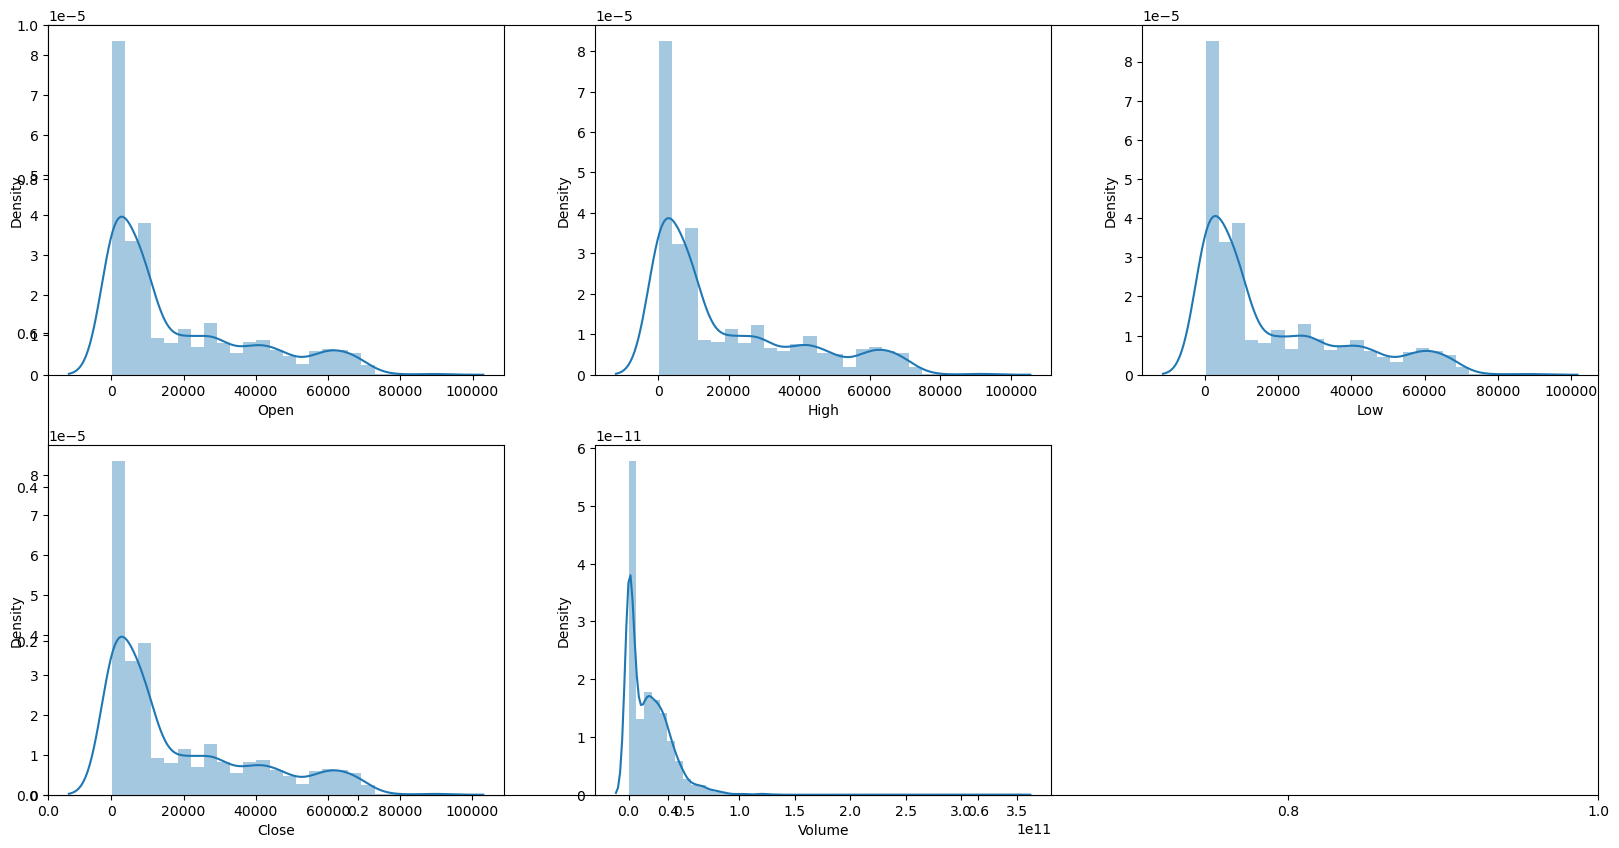

In [31]:
#Plot a histogram of the dataset

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(crypto_data[col])
plt.show()

As seen in the distribution, Open, high, low and close has only one peak while volume is left skewed

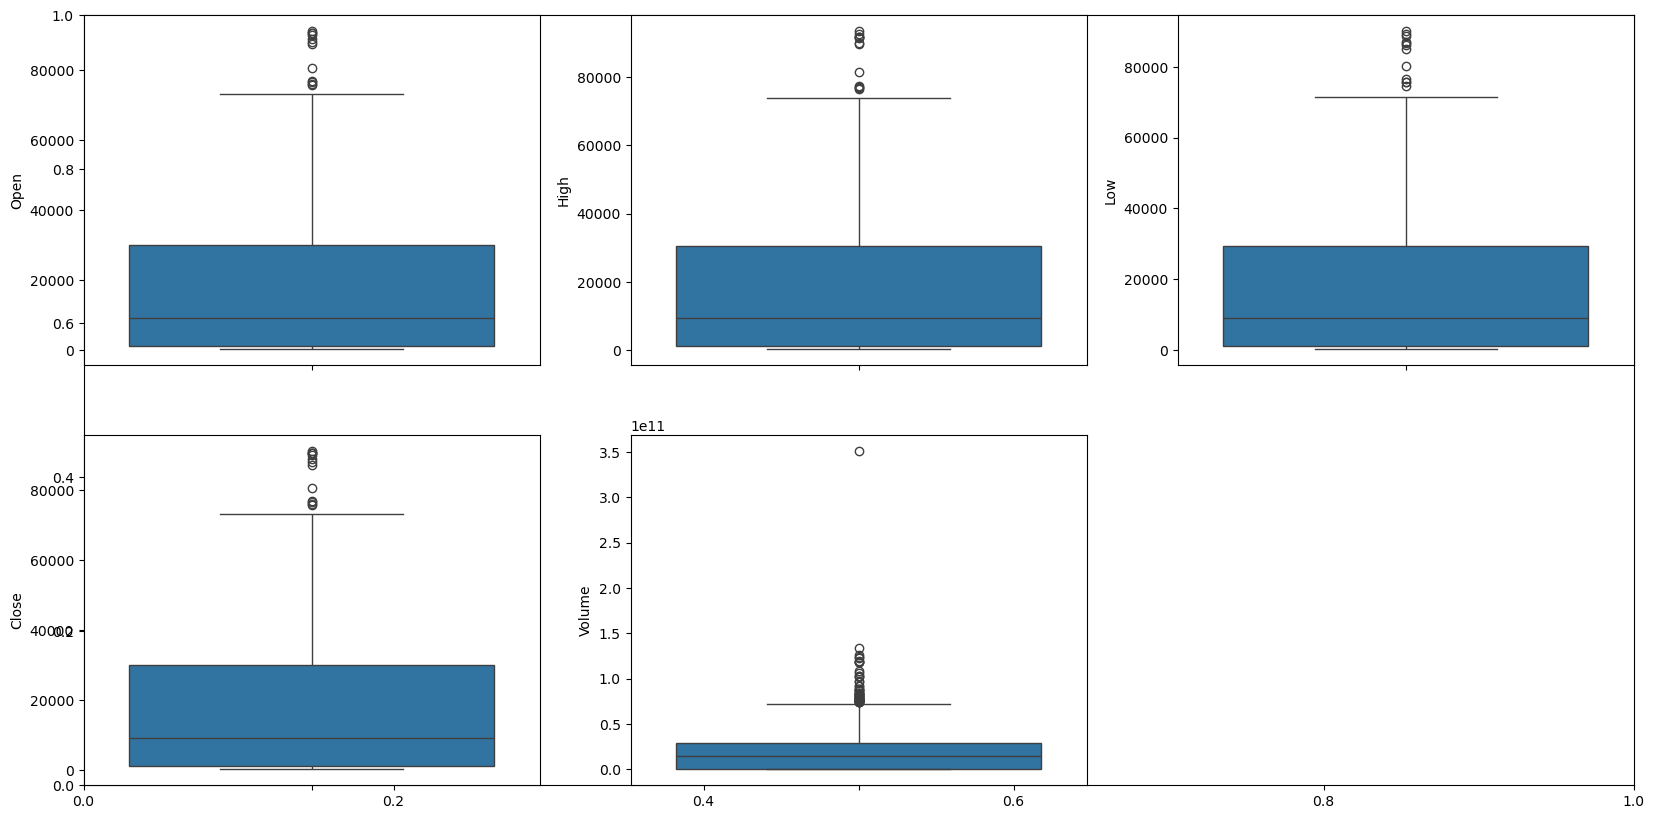

In [33]:
# Plot a boxplot 
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(crypto_data[col])
plt.show()

It can be deduced from the above that all the features have outliers , with volume data with the most outliers

Feature Engineering

In [35]:
# Reset the index to include the first column
crypto_data = crypto_data.reset_index(drop=False)

crypto_data

,Date,Close,High,Low,Open,Volume
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,2.105680e+07
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,3.448320e+07
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,3.791970e+07
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,3.686360e+07
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,2.658010e+07
...,...,...,...,...,...,...
3711,2024-11-14,87250.429690,91765.218750,86682.812500,90574.882810,8.761671e+10
3712,2024-11-15,91066.007810,91868.742190,87124.898440,87284.179690,7.824311e+10
3713,2024-11-16,90558.476560,91763.945310,90094.226560,91064.367190,4.433319e+10
3714,2024-11-17,89845.851560,91433.039060,88741.664060,90558.460940,4.635016e+10


In [37]:
#Covert date column to string
crypto_data['Date'] = crypto_data['Date'].astype(str)

crypto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3716 non-null   object 
 1   Close   3716 non-null   float64
 2   High    3716 non-null   float64
 3   Low     3716 non-null   float64
 4   Open    3716 non-null   float64
 5   Volume  3716 non-null   float64
dtypes: float64(5), object(1)
memory usage: 174.3+ KB


In [39]:
#Split the date column into day, month and year to spot the trends

splitted = crypto_data['Date'].str.split('-', expand=True)

crypto_data['day'] = splitted[2].astype('int')
crypto_data['month'] = splitted[1].astype('int')
crypto_data['year'] = splitted[0].astype('int')

crypto_data.head()

,Date,Close,High,Low,Open,Volume,day,month,year
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800.0,17,9,2014
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200.0,18,9,2014
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700.0,19,9,2014
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600.0,20,9,2014
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100.0,21,9,2014


In [41]:
crypto_data.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume', 'day', 'month',
       'year'],
      dtype='object')

In [45]:
#Create a new quarter columns

crypto_data['is_quarter_end'] = np.where(crypto_data['month']%3==0,1,0)
crypto_data.head()

,Date,Close,High,Low,Open,Volume,day,month,year,is_quarter_end
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800.0,17,9,2014,1
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200.0,18,9,2014,1
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700.0,19,9,2014,1
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600.0,20,9,2014,1
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100.0,21,9,2014,1


Seasonal changes occurs in crypto 90 days (3 months span)

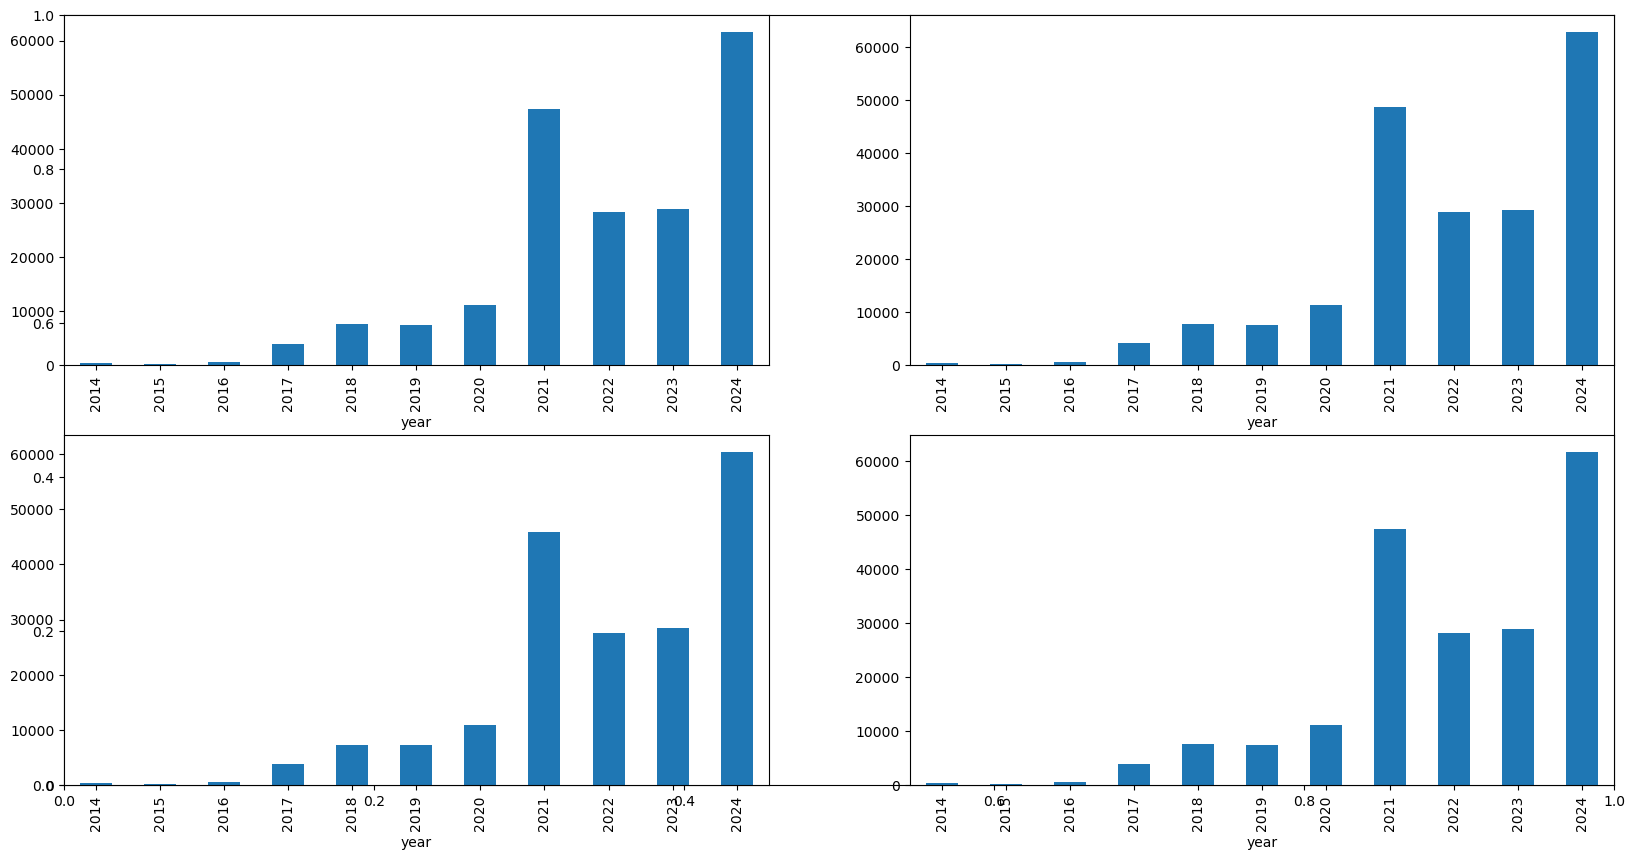

In [47]:
#Features price of BTC over the years

data_grouped = crypto_data.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()


As seen from the above, BTC price has two peaks, one in 2021 and 2024 and the price has surged over 200% over the last two years

In [49]:
crypto_data

,Date,Close,High,Low,Open,Volume,day,month,year,is_quarter_end
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,2.105680e+07,17,9,2014,1
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,3.448320e+07,18,9,2014,1
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,3.791970e+07,19,9,2014,1
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,3.686360e+07,20,9,2014,1
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,2.658010e+07,21,9,2014,1
...,...,...,...,...,...,...,...,...,...,...
3711,2024-11-14,87250.429690,91765.218750,86682.812500,90574.882810,8.761671e+10,14,11,2024,0
3712,2024-11-15,91066.007810,91868.742190,87124.898440,87284.179690,7.824311e+10,15,11,2024,0
3713,2024-11-16,90558.476560,91763.945310,90094.226560,91064.367190,4.433319e+10,16,11,2024,0
3714,2024-11-17,89845.851560,91433.039060,88741.664060,90558.460940,4.635016e+10,17,11,2024,0


In [51]:
# Drop Date and Index column, the group by is-quarter_end

crypto_data.drop('Date', axis=1).groupby('is_quarter_end').mean()

,Close,High,Low,Open,Volume,day,month,year
is_quarter_end,,,,,,,,
0,18905.269662,19307.130168,18437.434909,18876.627355,1.840487e+10,15.678485,6.117647,2019.343674
1,18237.074826,18634.276077,17780.316866,18225.274680,1.726560e+10,15.841977,7.517018,2019.186386


Create a predictor variable

In [53]:
# Create predictor and target variables
crypto_data['open-close']  = crypto_data['Open'] - crypto_data['Close']
crypto_data['low-high']  = crypto_data['Low'] - crypto_data['High']
crypto_data['target'] = np.where(crypto_data['Close'].shift(-1) > crypto_data['Close'], 1, 0)

crypto_data

,Date,Close,High,Low,Open,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2014-09-17,457.334015,468.174011,452.421997,465.864014,2.105680e+07,17,9,2014,1,8.529999,-15.752014,0
1,2014-09-18,424.440002,456.859985,413.104004,456.859985,3.448320e+07,18,9,2014,1,32.419983,-43.755981,0
2,2014-09-19,394.795990,427.834991,384.532013,424.102997,3.791970e+07,19,9,2014,1,29.307007,-43.302979,1
3,2014-09-20,408.903992,423.295990,389.882996,394.673004,3.686360e+07,20,9,2014,1,-14.230988,-33.412994,0
4,2014-09-21,398.821014,412.425995,393.181000,408.084991,2.658010e+07,21,9,2014,1,9.263977,-19.244995,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3711,2024-11-14,87250.429690,91765.218750,86682.812500,90574.882810,8.761671e+10,14,11,2024,0,3324.453120,-5082.406250,1
3712,2024-11-15,91066.007810,91868.742190,87124.898440,87284.179690,7.824311e+10,15,11,2024,0,-3781.828120,-4743.843750,0
3713,2024-11-16,90558.476560,91763.945310,90094.226560,91064.367190,4.433319e+10,16,11,2024,0,505.890630,-1669.718750,0
3714,2024-11-17,89845.851560,91433.039060,88741.664060,90558.460940,4.635016e+10,17,11,2024,0,712.609380,-2691.375000,1


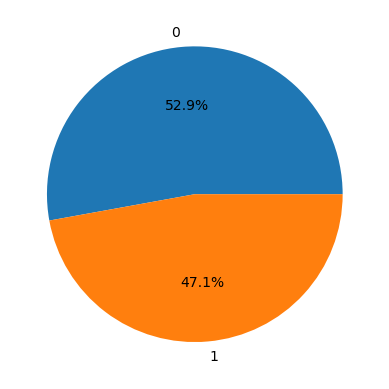

In [55]:
#Visualize if the target is balanced

plt.pie(crypto_data['target'].value_counts().values, 
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

The data appears to be slightly balance

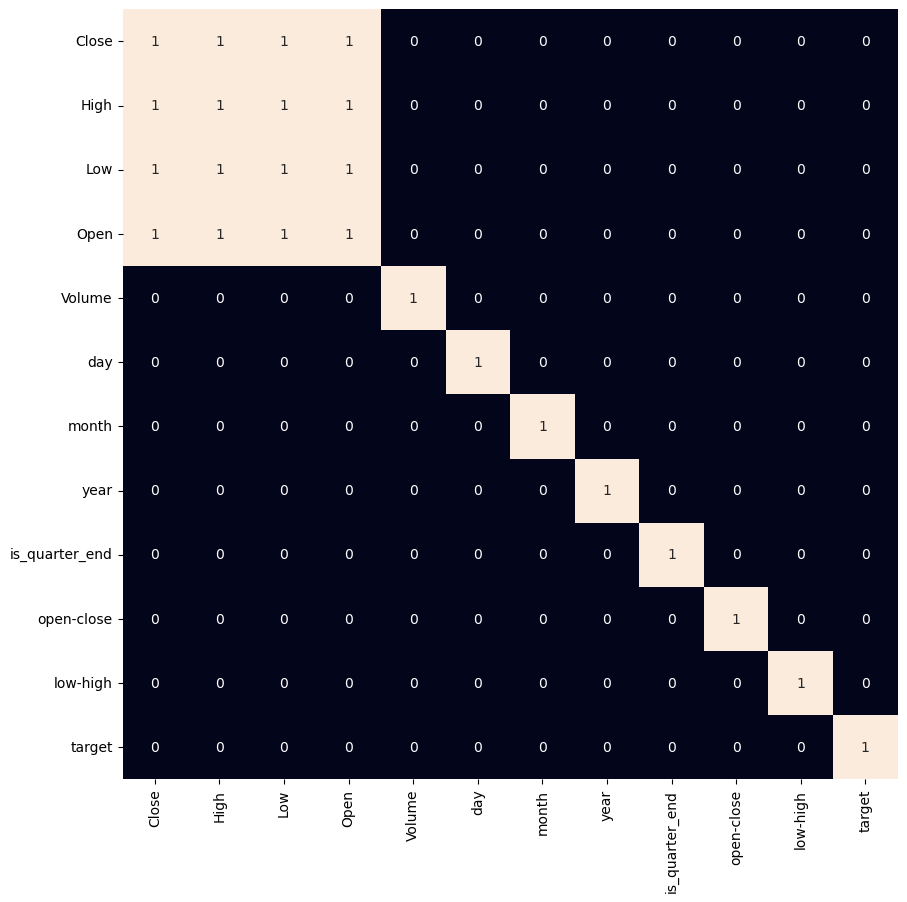

In [58]:
#Visualize the added columns to check for correlation


plt.figure(figsize=(10, 10)) 
sb.heatmap(crypto_data.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

As seen from the heatmap, there is a high correlation between Open, High, Low, Close that is  pretty obvious, and the added features are not highly correlated

Feature Engineering

In [84]:
#Splitting and data normalization

features = crypto_data[['Close', 'High', 'Low', 'Open', 'is_quarter_end', 'Volume', 'open-close', 'low-high']]
target = crypto_data['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape)

(2972, 8) (744, 8)


**Model Development and Evaluation**

In [86]:
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

# Define the models 
models = [
    LogisticRegression(),
    SVC(kernel='poly', probability=True),
    XGBClassifier(),
    LGBMClassifier()  
]

# Training and evaluation loop
for model in models:
    # Train the model
    model.fit(X_train, Y_train)
    
    # Print the model name
    print(f'{model.__class__.__name__} :')
    
    # Calculate and print training accuracy (ROC AUC score)
    train_auc = metrics.roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])
    print('Training Accuracy (AUC):', train_auc)
    
    # Calculate and print validation accuracy (ROC AUC score)
    valid_auc = metrics.roc_auc_score(Y_valid, model.predict_proba(X_valid)[:, 1])
    print('Validation Accuracy (AUC):', valid_auc)
    
    print()  # Empty line for better readability


LogisticRegression :
Training Accuracy (AUC): 0.540136753721508
Validation Accuracy (AUC): 0.5235260031870201

SVC :
Training Accuracy (AUC): 0.5459021601016518
Validation Accuracy (AUC): 0.5215703317398233

XGBClassifier :
Training Accuracy (AUC): 0.9876377671496585
Validation Accuracy (AUC): 0.5141460234680573

[LightGBM] [Info] Number of positive: 1574, number of negative: 1398
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1788
[LightGBM] [Info] Number of data points in the train set: 2972, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.529610 -> initscore=0.118578
[LightGBM] [Info] Start training from score 0.118578
LGBMClassifier :
Training Accuracy (AUC): 0.9382317814703526
Validation Accuracy (AUC): 0.533905548312328



As seen, LGBM performed the best

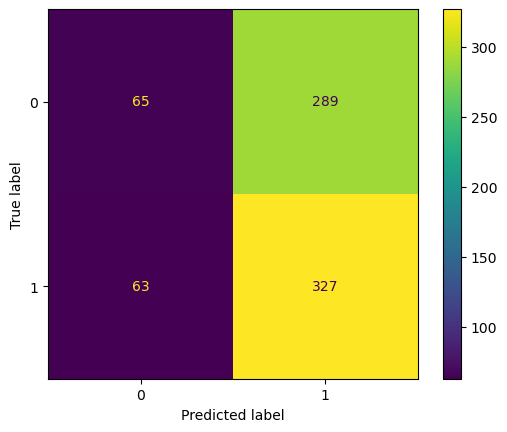

In [88]:
#Model Evaluation for validation

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()

The following can be deduced from the confusion matrix;

1.The model has high recall, meaning it correctly identifies most positive cases (class 1).
However, it suffers from a high false positive rate (93.50%), incorrectly classifying many negatives (class 0) as positives.
This imbalance suggests the model may be overly biased towards predicting the positive class (1), possibly due to skewed data